In [7]:
# 메모리 변수 모두 제거
all = [var for var in globals() if var[0] != "_"]
for var in all:
    del globals()[var]

# 메모리 변수 확인
#globals()

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings(action='ignore')

# 한글 폰트 사용
plt.rc('font', family='NanumGothic') # For Windows

# 그래프에서 마이너스 기호가 표시
# matplotlib.rcParams['axes.unicode_minus'] = False

# 데이터 로드

In [332]:
train = pd.read_csv('train_메뉴제외.csv')
train.head()
train.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '중식계', '석식계', '식사가능인원', '중식결식', '석식결식', '중식강수여부', '중식기온',
       '중식강수량', '석식강수여부', '석식기온', '석식강수량', '확진자수', '휴일전날', '휴일다음날'],
      dtype='object')

In [333]:
# 컬럼명이 너무 길어서 컬럼명 수정
train = train.copy()
train.columns =['일자', '요일', '정원수', '휴가자수', '출장자수', '야근자수',
       '재택근무자수', '중식계', '석식계', '식사가능인원', '중식결식', '석식결식', '중식강수여부', '중식기온',
       '중식강수량', '석식강수여부', '석식기온', '석식강수량', '확진자수', '휴일전날', '휴일다음날']
train.head(2)

,일자,요일,정원수,휴가자수,출장자수,야근자수,재택근무자수,중식계,석식계,식사가능인원,...,석식결식,중식강수여부,중식기온,중식강수량,석식강수여부,석식기온,석식강수량,확진자수,휴일전날,휴일다음날
0,2016-02-01,월,2601,50,150,238,0.0,1039.0,331.0,2401.0,...,2070.0,0.0,3.0,0.0,0.0,0.9,0.0,0.0,0,1
1,2016-02-02,화,2601,50,173,319,0.0,867.0,560.0,2378.0,...,1818.0,0.0,1.7,0.0,0.0,2.4,0.0,0.0,0,0


In [334]:
# 코로나 데이터 로드
corona = pd.read_csv('코로나정보.csv')
corona.head()

,createDt,deathCnt,defCnt,gubun,gubunCn,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,seq,stdDay,updateDt
0,2021-04-10 09:00:00.000,1765,108939,합계,合计,Total,677,99287,7887,662,15,210.11,8493,2021년 04월 10일 00시,2021-09-16 10:11:33.897
1,2021-04-10 09:00:00.000,434,33855,서울,首尔,Seoul,201,30779,2642,198,3,347.82,8492,2021년 04월 10일 00시,2021-09-16 10:11:33.897
2,2021-04-10 09:00:00.000,120,4300,부산,釜山,Busan,56,3566,614,56,0,126.03,8491,2021년 04월 10일 00시,2021-09-16 10:11:33.897
3,2021-04-10 09:00:00.000,218,9063,대구,大邱,Daegu,5,8684,161,4,1,371.97,8490,2021년 04월 10일 00시,2021-09-16 10:11:33.897
4,2021-04-10 09:00:00.000,58,5335,인천,仁川,Incheon,24,4964,313,24,0,180.47,8489,2021년 04월 10일 00시,2021-09-16 10:11:33.897


In [335]:
# 경남 데이터만 추출 
corona = corona[corona['gubun']=='경남'].reset_index(drop=True)

In [336]:
# createDt에서 시간을 제외하고 날짜만 남김
for i in range(len(corona)):
    corona['createDt'][i] = corona['createDt'][i].split(' ')[0]

In [337]:
# 날짜, 확진자수 데이터만 남겨놓음
corona = corona[['createDt', 'incDec']]
corona.columns = ['일자', '경남확진자수']
corona.head()

,일자,경남확진자수
0,2021-04-10,46
1,2021-04-09,15
2,2021-04-08,11
3,2021-04-07,25
4,2021-04-06,7


In [338]:
# train data, corona data merge
train = pd.merge(train, corona, how='left', on='일자')
train.head()

,일자,요일,정원수,휴가자수,출장자수,야근자수,재택근무자수,중식계,석식계,식사가능인원,...,중식강수여부,중식기온,중식강수량,석식강수여부,석식기온,석식강수량,확진자수,휴일전날,휴일다음날,경남확진자수
0,2016-02-01,월,2601,50,150,238,0.0,1039.0,331.0,2401.0,...,0.0,3.0,0.0,0.0,0.9,0.0,0.0,0,1,NaN
1,2016-02-02,화,2601,50,173,319,0.0,867.0,560.0,2378.0,...,0.0,1.7,0.0,0.0,2.4,0.0,0.0,0,0,NaN
2,2016-02-03,수,2601,56,180,111,0.0,1017.0,573.0,2365.0,...,0.0,3.2,0.0,0.0,3.0,0.0,0.0,0,0,NaN
3,2016-02-04,목,2601,104,220,355,0.0,978.0,525.0,2277.0,...,0.0,3.7,0.0,0.0,4.0,0.0,0.0,0,0,NaN
4,2016-02-05,금,2601,278,181,34,0.0,925.0,330.0,2142.0,...,0.0,6.3,0.0,0.0,5.7,0.0,0.0,1,0,NaN


In [339]:
# 확진자수 최초 발생일인 2020.02.04일을 기준으로 이전, 이후의 식사인원의 차이가 있는지 확인
train['corona'] = train['일자'].apply(lambda x: 'no' if x < '2020-02-04' else 'yes' )
train['corona'].value_counts()

no     977
yes    228
Name: corona, dtype: int64

In [340]:
# 월, 년 데이터 추가
train['일자'] = pd.to_datetime(train['일자'])
train['월'] = train['일자'].dt.month
train['년'] = train['일자'].dt.year

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1205 entries, 0 to 1204
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      1205 non-null   datetime64[ns]
 1   요일      1205 non-null   object        
 2   정원수     1205 non-null   int64         
 3   휴가자수    1205 non-null   int64         
 4   출장자수    1205 non-null   int64         
 5   야근자수    1205 non-null   int64         
 6   재택근무자수  1205 non-null   float64       
 7   중식계     1205 non-null   float64       
 8   석식계     1205 non-null   float64       
 9   식사가능인원  1205 non-null   float64       
 10  중식결식    1205 non-null   float64       
 11  석식결식    1205 non-null   float64       
 12  중식강수여부  1205 non-null   float64       
 13  중식기온    1205 non-null   float64       
 14  중식강수량   1205 non-null   float64       
 15  석식강수여부  1205 non-null   float64       
 16  석식기온    1205 non-null   float64       
 17  석식강수량   1205 non-null   float64       
 18  확진자수    

# 경남 코로나 데이터 확인

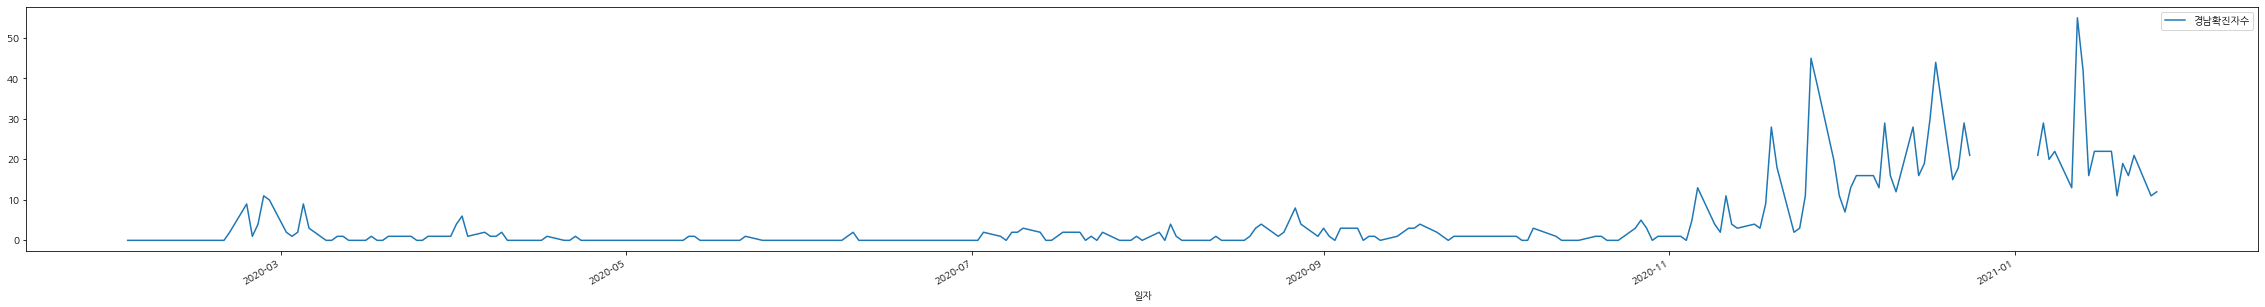

In [341]:
train.plot(x = '일자', y ='경남확진자수', figsize = (40, 5))
plt.show()

- 2020년 말 ~ 2021년 초에 없는 데이터 있음

In [342]:
# null data 찾아서 입력
train['경남확진자수'] = train['경남확진자수'].fillna(0)
train.loc[1188,'확진자수'] = 985
train.loc[1188,'경남확진자수'] = 33

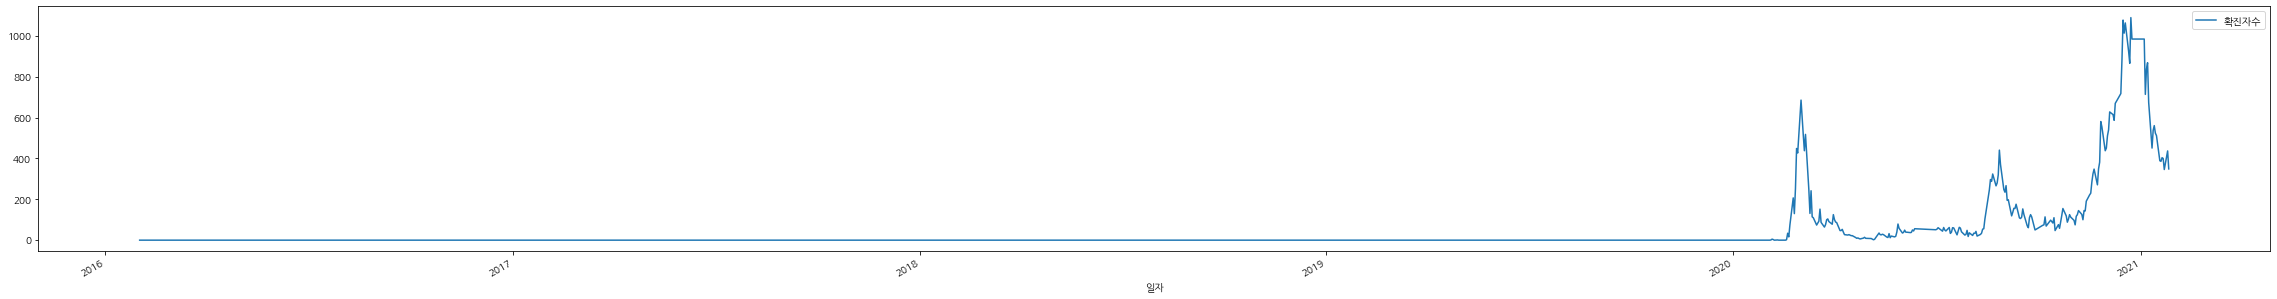

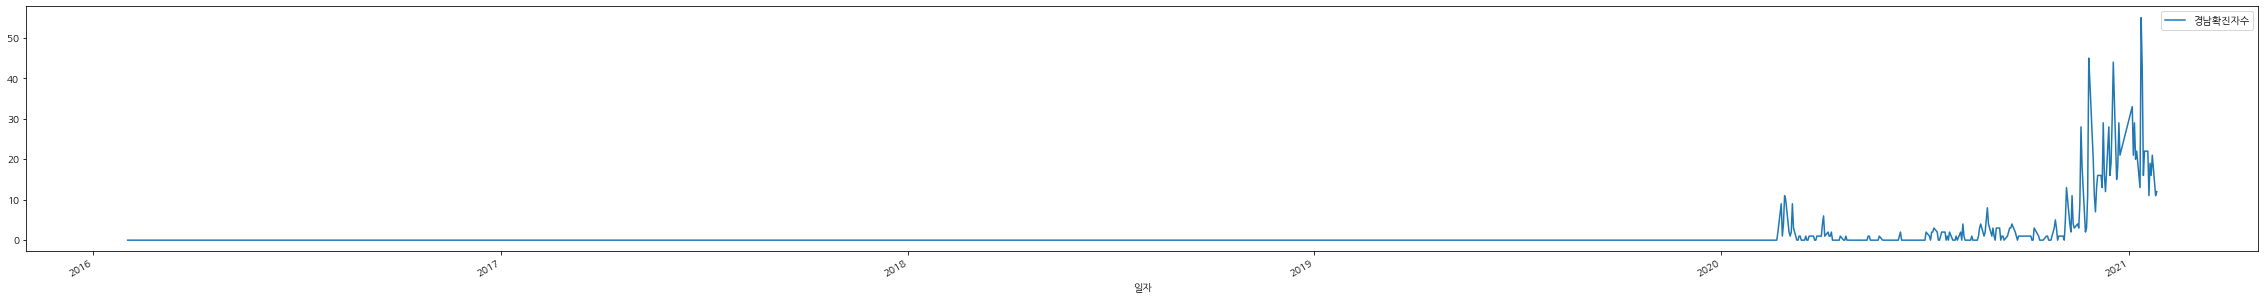

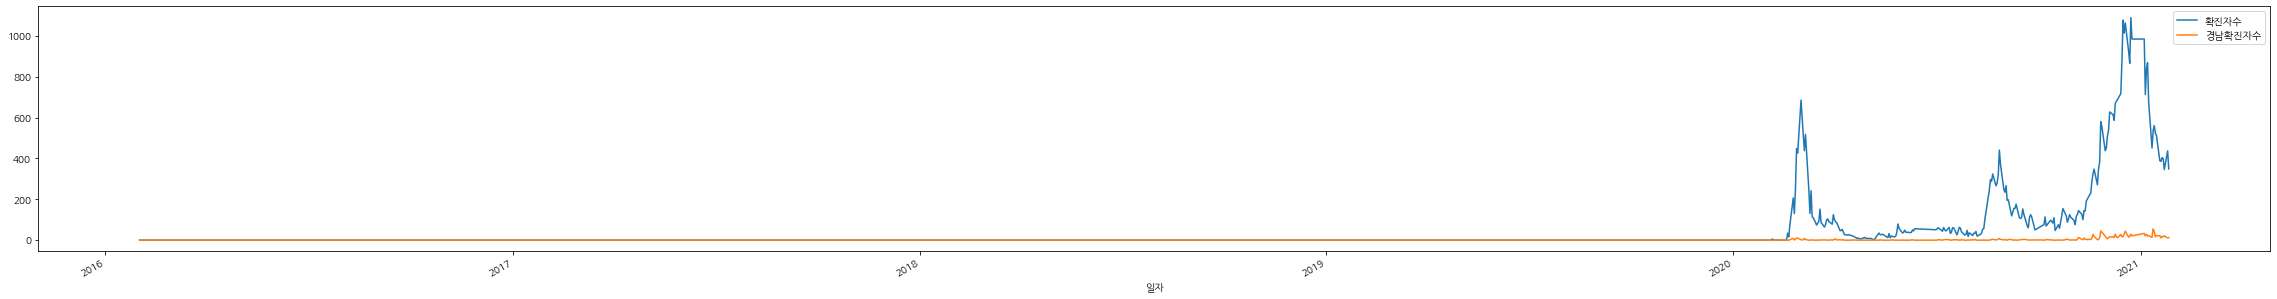

In [343]:
train.plot(x = '일자', y ='확진자수', figsize = (40, 5))
train.plot(x = '일자', y ='경남확진자수', figsize = (40, 5))
train.plot(x = '일자', y =['확진자수', '경남확진자수'], figsize = (40, 5))
plt.show()

In [355]:
# 전날확진자수 컬럼 생성
train['전날확진자수'] = '.'
for i in range(len(train)):
    if i!=0 : 
        train['전날확진자수'][i] = train['확진자수'][i-1]
    if i==0:
        train['전날확진자수'][i] = 0
        
# 경남 전날확진자수 컬럼 생성
train['경남전날확진자수'] = '.'
for i in range(len(train)):
    if i!=0 : 
        train['경남전날확진자수'][i] = train['경남확진자수'][i-1] * 10
    if i==0:
        train['경남전날확진자수'][i] = 0

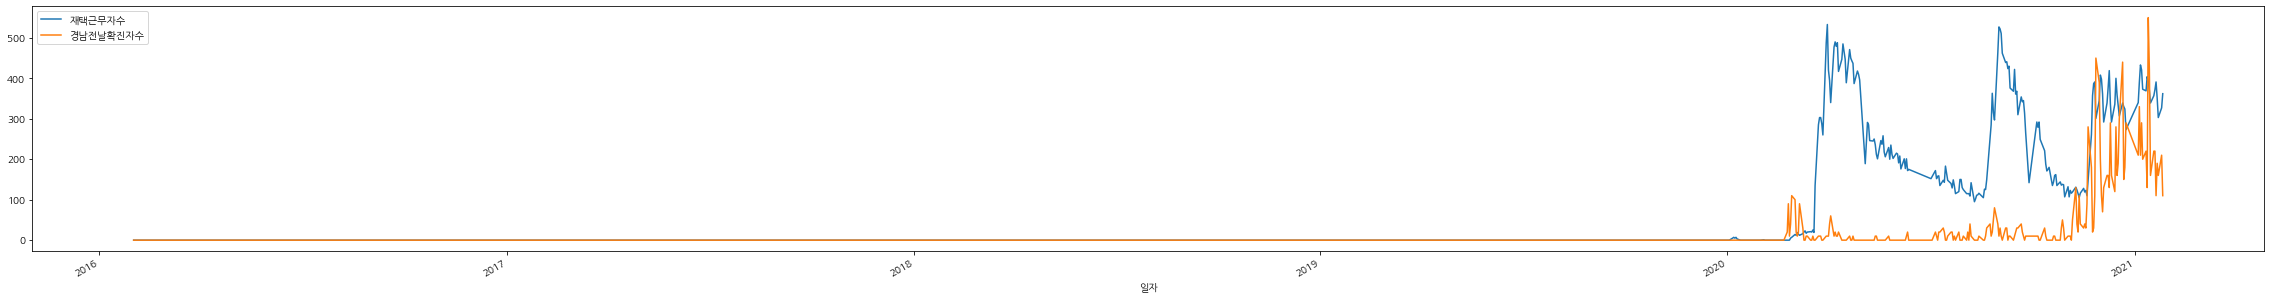

In [360]:
train.plot(x = '일자', y = ['재택근무자수','경남전날확진자수'], figsize = (40, 5))
plt.show()

In [361]:
# 코로나 이후의 데이터만 추출
corona = train[train['corona']=='yes']

<AxesSubplot:xlabel='경남전날확진자수', ylabel='재택근무자수'>

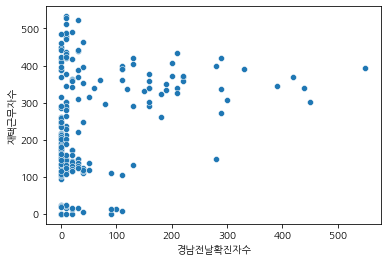

In [365]:
sns.scatterplot(x='경남전날확진자수', y='재택근무자수', data=corona)

# 여기부터 다시 시작

In [395]:
# 메모리 변수 모두 제거
all = [var for var in globals() if var[0] != "_"]
for var in all:
    del globals()[var]

# 메모리 변수 확인
#globals()

In [396]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings(action='ignore')

# 한글 폰트 사용
plt.rc('font', family='NanumGothic') # For Windows

# 그래프에서 마이너스 기호가 표시
# matplotlib.rcParams['axes.unicode_minus'] = False

## 데이터 불러오기

In [397]:
train = pd.read_csv('train_메뉴제외.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [398]:
# 데이터 결측치 확인
print(train.info())
print()
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   중식계             1205 non-null   float64
 8   석식계             1205 non-null   float64
 9   식사가능인원          1205 non-null   float64
 10  중식결식            1205 non-null   float64
 11  석식결식            1205 non-null   float64
 12  중식강수여부          1205 non-null   float64
 13  중식기온            1205 non-null   float64
 14  중식강수량           1205 non-null   float64
 15  석식강수여부          1205 non-null   float64
 16  석식기온            1205 non-null   float64
 17  석식강수량           1205 non-null   f

- 데이터 결측치 존재하지 않음.

## 베이스라인

### target split

In [399]:
# 월, 년 데이터 추가
def date(data):
    data['일자'] = pd.to_datetime(data['일자'])
    data['월'] = data['일자'].dt.month
    data['년'] = data['일자'].dt.year
    data['요일'] = (data['일자'].dt.weekday)+1

date(train); date(test)

In [400]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   일자              50 non-null     datetime64[ns]
 1   요일              50 non-null     int64         
 2   본사정원수           50 non-null     int64         
 3   본사휴가자수          50 non-null     int64         
 4   본사출장자수          50 non-null     int64         
 5   본사시간외근무명령서승인건수  50 non-null     int64         
 6   현본사소속재택근무자수     50 non-null     float64       
 7   조식메뉴            50 non-null     object        
 8   중식메뉴            50 non-null     object        
 9   석식메뉴            50 non-null     object        
 10  월               50 non-null     int64         
 11  년               50 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(3)
memory usage: 4.8+ KB


In [401]:
x_train = train[['요일', '본사정원수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수']]
y1_train = train['중식계']
y2_train = train['석식계']

x_test = test[['요일', '본사정원수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수']]

### 점심, 저녁 예측 모델 각각 생성

In [430]:
# log 단위(1e+01)로 1.e-04 ~ 1.e+01 사이의 구간에 대해 parameter를 탐색한다. 
Lasso_params = {'alpha':np.logspace(-4, 1, 6)}

model1 = Lasso()
model2 = Lasso()

lunch_model = GridSearchCV(model1, Lasso_params, scoring='neg_mean_absolute_error')
dinner_model = GridSearchCV(model2, Lasso_params, scoring='neg_mean_absolute_error')

lunch_model.fit(x_train, y1_train)
dinner_model.fit(x_train, y2_train)

lunch_best = lunch_model.best_score_
dinner_best = dinner_model.best_score_

print('점심 베이스라인 모델 에러값(mae) : ',lunch_best)
print('저녁 베이스라인 모델 에러값(mae) : ',dinner_best)

점심 베이스라인 모델 에러값(mae) :  -100.79160667897817
저녁 베이스라인 모델 에러값(mae) :  -81.57103774303614


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
params = {
    'n_estimators': [50,100,150,200,300,500,1000],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [1,2,3,5,6,10],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 3, 5, 10]}

model1 = RandomForestRegressor(n_jobs=-1, random_state=42)
model2 = RandomForestRegressor(n_jobs=-1, random_state=42)

lunch_model = GridSearchCV(model1, params, scoring='neg_mean_absolute_error')
dinner_model = GridSearchCV(model2, params, scoring='neg_mean_absolute_error')

lunch_model.fit(x_train, y1_train)
dinner_model.fit(x_train, y2_train)

lunch_best = lunch_model.best_score_
dinner_best = dinner_model.best_score_

print('점심 베이스라인 모델 에러값(mae) : ',lunch_best)
print('저녁 베이스라인 모델 에러값(mae) : ',dinner_best)

In [ ]:
from sklearn.metrics import mean_squared_error  # MSE 
print(mean_squared_error(predict,y_test))